# importando bibliotecas

In [1]:
import cv2

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [4]:
#Lendo os dados com pandas 
dados = pd.read_csv("winequality-red.csv")

#exibindo os cinco primeiros do dataset
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Adicionando nome ID na primeira coluna 
dados.rename_axis("ID", axis = 'columns', inplace = True)
dados.head()

ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# criando uma matriz X com os valores do data frame
X = dados.iloc[:,0:-1].values # exceto a coluna dos IDs e da classe

In [9]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [10]:
#Vamos converter os recursos normalizados em um formato tabular com a ajuda do DataFrame
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
normalised_dados = pd.DataFrame(X,columns=feat_cols)
normalised_dados.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308
1598,-1.332702,-1.216849,1.021999,0.752894,-0.434990,0.203223,-0.135861,-0.666057,0.511130,0.010924,0.541630


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dados = pca.fit_transform(normalised_dados)

In [12]:
pca_df = pd.DataFrame(data = pca_dados, columns = ['principal componente 1', 'principal componente 2'])
finalDf = pd.concat([pca_df, dados[['quality']]], axis = 1)

In [13]:
finalDf

,principal componente 1,principal componente 2,quality
0,-1.619530,0.450950,5
1,-0.799170,1.856553,5
2,-0.748479,0.882039,5
3,2.357673,-0.269976,6
4,-1.619530,0.450950,5
...,...,...,...
1594,-2.150500,0.814286,5
1595,-2.214496,0.893101,6
1596,-1.456129,0.311746,6
1597,-2.270518,0.979791,5


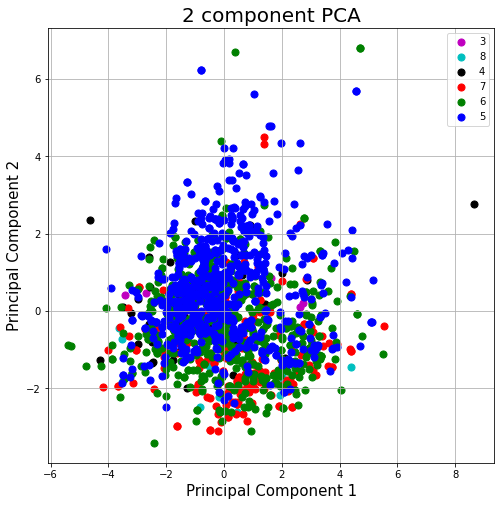

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [3, 8, 4, 7, 6, 5]
colors = ['m', 'c', 'k', 'r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1'], 
               finalDf.loc[indicesToKeep, 'principal componente 2'], 
               c = color, s = 50)
ax.legend(targets)
ax.grid()

In [15]:
pca_dados = pca.fit(normalised_dados)
cov = pca_dados.get_covariance()

In [16]:
from scipy import linalg as LA

values, vectors = LA.eig(cov)

In [17]:
values = np.around(values, 4)

In [18]:
print('Matriz de covariância: ')
covariance_pd = pd.DataFrame(cov)
display(covariance_pd)

Matriz de covariância: 


,0,1,2,3,4,5,6,7,8,9,10
0,1.263152,-0.322840,0.573992,0.136243,0.232412,-0.114778,-0.051359,0.438804,-0.523804,0.294887,-0.081122
1,-0.322840,0.898459,-0.322244,0.009519,-0.071994,0.199325,0.184012,-0.148754,0.257275,-0.154267,-0.068246
2,0.573992,-0.322244,1.217190,0.112913,0.211410,-0.139292,-0.082528,0.401883,-0.496710,0.281642,-0.053901
3,0.136243,0.009519,0.112913,0.809801,0.126435,0.163582,0.204062,0.221011,-0.153820,0.073584,-0.173001
4,0.232412,-0.071994,0.211410,0.126435,0.801753,0.077317,0.118665,0.248145,-0.225546,0.118617,-0.130764
5,-0.114778,0.199325,-0.139292,0.163582,0.077317,1.000554,0.367258,0.116649,0.042989,-0.045758,-0.240477
6,-0.051359,0.184012,-0.082528,0.204062,0.118665,0.367258,1.075204,0.190689,-0.020365,-0.013052,-0.284229
7,0.438804,-0.148754,0.401883,0.221011,0.248145,0.116649,0.190689,1.114073,-0.420484,0.222950,-0.222995
8,-0.523804,0.257275,-0.496710,-0.153820,-0.225546,0.042989,-0.020365,-0.420484,1.132946,-0.259897,0.117724
9,0.294887,-0.154267,0.281642,0.073584,0.118617,-0.045758,-0.013052,0.222950,-0.259897,0.809876,-0.048713


In [19]:
print('Autovalores: ')
values_pd = pd.DataFrame(values)
display(values_pd)

Autovalores: 


,0
0,0.6643+0.0000j
1,3.1011+0.0000j
2,1.9271+0.0000j
3,0.6643+0.0000j
4,0.6643+0.0000j
5,0.6643-0.0000j
6,0.6643+0.0000j
7,0.6643+0.0000j
8,0.6643+0.0000j
9,0.6643+0.0000j


In [20]:
print('Autovetores: ')
vectors_pd = pd.DataFrame(vectors)
display(vectors_pd)

Autovetores: 


,0,1,2,3,4,5,6,7,8,9,10
0,-0.865078+0.000000j,-0.489314+0.000000j,0.110503+0.000000j,-0.138315+0.000000j,-0.059229-0.085152j,-0.059229+0.085152j,0.046731+0.000000j,-0.025147+0.000000j,-0.060442+0.000000j,-0.133353+0.000000j,0.038904+0.000000j
1,-0.170069+0.000000j,0.238584+0.000000j,-0.274930+0.000000j,-0.078216+0.000000j,-0.040576+0.463650j,-0.040576-0.463650j,-0.059597+0.000000j,0.076943+0.000000j,0.339897+0.000000j,-0.133915+0.000000j,-0.189096+0.000000j
2,0.281633+0.000000j,-0.463632+0.000000j,0.151791+0.000000j,0.217431+0.000000j,0.301614+0.349557j,0.301614-0.349557j,-0.164934+0.000000j,0.251385+0.000000j,-0.068914+0.000000j,0.309985+0.000000j,0.155612+0.000000j
3,0.047888+0.000000j,-0.146107+0.000000j,-0.272080+0.000000j,-0.652938+0.000000j,-0.262808+0.317351j,-0.262808-0.317351j,0.194029+0.000000j,-0.030489+0.000000j,-0.215644+0.000000j,0.596532+0.000000j,-0.094840+0.000000j
4,0.101141+0.000000j,-0.212247+0.000000j,-0.148052+0.000000j,-0.184149+0.000000j,0.067826-0.088194j,0.067826+0.088194j,-0.530275+0.000000j,-0.137986+0.000000j,-0.086581+0.000000j,-0.463877+0.000000j,0.225053+0.000000j
5,-0.086053+0.000000j,0.036158+0.000000j,-0.513567+0.000000j,0.136190+0.000000j,0.063902-0.012821j,0.063902+0.012821j,0.209196+0.000000j,-0.668907+0.000000j,-0.288516+0.000000j,-0.133506+0.000000j,0.617334+0.000000j
6,-0.059410+0.000000j,-0.023575+0.000000j,-0.569487+0.000000j,0.120053+0.000000j,-0.004730-0.207453j,-0.004730+0.207453j,0.285291+0.000000j,0.657083+0.000000j,-0.124580+0.000000j,-0.131747+0.000000j,-0.149107+0.000000j
7,0.193787+0.000000j,-0.395353+0.000000j,-0.233575+0.000000j,-0.043502+0.000000j,0.101890-0.144337j,0.101890+0.144337j,-0.067076+0.000000j,-0.033288+0.000000j,0.808820+0.000000j,0.105947+0.000000j,0.071974+0.000000j
8,-0.248897+0.000000j,0.438520+0.000000j,-0.006711+0.000000j,-0.408991+0.000000j,0.466770+0.000000j,0.466770-0.000000j,-0.312361+0.000000j,0.155032+0.000000j,0.227712+0.000000j,0.430538+0.000000j,0.005870+0.000000j
9,0.142201+0.000000j,-0.242921+0.000000j,0.037554+0.000000j,-0.441759+0.000000j,0.213540+0.093223j,0.213540-0.093223j,0.320463+0.000000j,-0.064003+0.000000j,-0.125415+0.000000j,0.075826+0.000000j,-0.466564+0.000000j


In [21]:
explained_variance = pca_dados.explained_variance_
explained_variance

array([3.10107182, 1.92711489])

In [22]:
n_components = 2
pca_test = PCA(n_components)
pca_dados_test = pca_test.fit_transform(normalised_dados)

In [23]:
#No exemplo abaixo, nosso conjunto de dados contém 10 recursos, mas selecionamos apenas os 2 primeiros componente e eles explicam 45% da variância total.

total_var = pca_test.explained_variance_ratio_.sum() * 100

print(total_var)

45.682201184294094


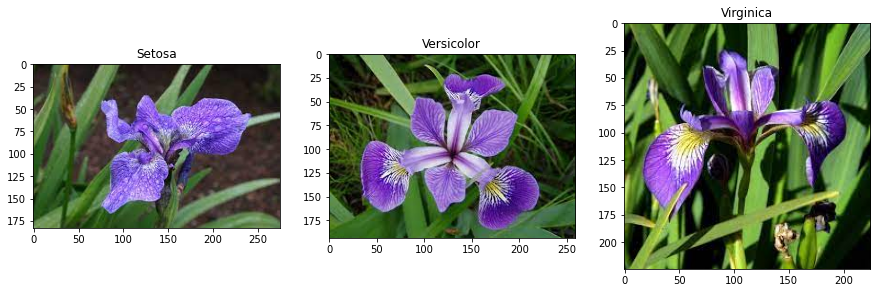

In [24]:
import cv2

setosa = cv2.cvtColor(cv2.imread('setosa.jpg'), cv2.COLOR_BGR2RGB)
versicolor = cv2.cvtColor(cv2.imread('versicolor.jpg'), cv2.COLOR_BGR2RGB)
virginica = cv2.cvtColor(cv2.imread('virginica.jpg'), cv2.COLOR_BGR2RGB)

# Plotando as imagens 
fig = plt.figure (figsize = (15, 7.2)) 
fig.add_subplot (131) 
plt.title ("Setosa") 
plt.imshow (setosa)
fig.add_subplot (132) 
plt.title ("Versicolor") 
plt.imshow (versicolor)
fig.add_subplot (133) 
plt.title ("Virginica") 
plt.imshow (virginica)
plt.show ()

In [25]:
print(setosa.shape)
print(versicolor.shape)
print(virginica.shape)

(183, 275, 3)
(194, 259, 3)
(225, 225, 3)


In [26]:
# Convertendo do channel 3(rgb) para 1 channel(gray)
gray_setosa = cv2.cvtColor(setosa, cv2.COLOR_BGR2GRAY)
gray_versicolor = cv2.cvtColor(versicolor, cv2.COLOR_BGR2GRAY)
gray_virginica = cv2.cvtColor(virginica, cv2.COLOR_BGR2GRAY)
                              
print(gray_setosa.shape)
print(gray_versicolor.shape)
print(gray_virginica.shape)

(183, 275)
(194, 259)
(225, 225)


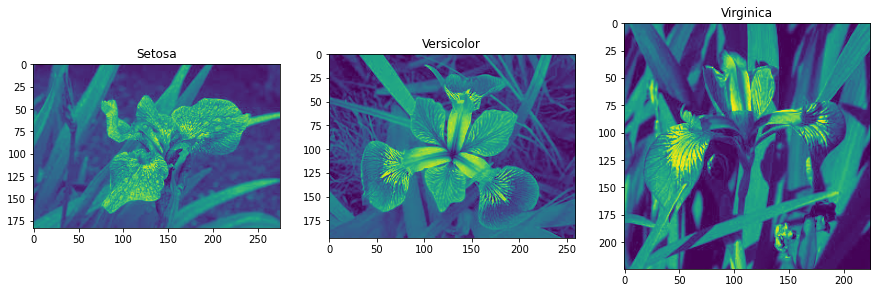

In [27]:
# Plotando as imagens 
fig = plt.figure (figsize = (15, 7.2)) 
fig.add_subplot (131) 
plt.title ("Setosa") 
plt.imshow (gray_setosa)
fig.add_subplot (132) 
plt.title ("Versicolor") 
plt.imshow (gray_versicolor)
fig.add_subplot (133) 
plt.title ("Virginica") 
plt.imshow (gray_virginica)
plt.show ()

In [32]:
gray_setosa_df = pd.DataFrame(data = gray_setosa)
gray_versicolor_df = pd.DataFrame(data = gray_versicolor)
gray_virginica_df = pd.DataFrame(data = gray_virginica)

In [33]:
df_setosa = gray_setosa/255
df_versicolor = gray_versicolor/255
df_virginica = gray_virginica/255

In [35]:
pca_setosa_50 = PCA(n_components=50)
pca_versicolor_50 = PCA(n_components=50)
pca_virginica_50 = PCA(n_components=50)

pca_setosa_20 = PCA(n_components=20)
pca_versicolor_20 = PCA(n_components=20)
pca_virginica_20 = PCA(n_components=20)

pca_setosa_10 = PCA(n_components=10)
pca_versicolor_10 = PCA(n_components=10)
pca_virginica_10 = PCA(n_components=10)

pca_setosa_50.fit(df_setosa)
trans_pca_setosa_50 = pca_setosa_50.transform(df_setosa)

pca_versicolor_50.fit(df_versicolor)
trans_pca_versicolor_50 = pca_versicolor_50.transform(df_versicolor)

pca_virginica_50.fit(df_virginica)
trans_pca_virginica_50 = pca_virginica_50.transform(df_virginica)


pca_setosa_20.fit(df_setosa)
trans_pca_setosa_20 = pca_setosa_20.transform(df_setosa)

pca_versicolor_20.fit(df_versicolor)
trans_pca_versicolor_20 = pca_versicolor_20.transform(df_versicolor)

pca_virginica_20.fit(df_virginica)
trans_pca_virginica_20 = pca_virginica_20.transform(df_virginica)


pca_setosa_10.fit(df_setosa)
trans_pca_setosa_10 = pca_setosa_10.transform(df_setosa)

pca_versicolor_10.fit(df_versicolor)
trans_pca_versicolor_10 = pca_versicolor_10.transform(df_versicolor)

pca_virginica_10.fit(df_virginica)
trans_pca_virginica_10 = pca_virginica_10.transform(df_virginica)

In [37]:
print(trans_pca_setosa_50.shape)
print(trans_pca_versicolor_50.shape)
print(trans_pca_virginica_50.shape)

(183, 50)
(194, 50)
(225, 50)


In [38]:
#verificar a soma das razões de variância explicadas dos 50 componentes do PCA
#usando apenas 50 componentes, podemos manter mais de 94% da variância dos dados.

print(f"Setosa : {sum(pca_setosa_50.explained_variance_ratio_)}")
print(f"Versicolor : {sum(pca_versicolor_50.explained_variance_ratio_)}")
print(f"Virginica : {sum(pca_virginica_50.explained_variance_ratio_)}")

Setosa : 0.9715654453135676
Versicolor : 0.9470512979168727
Virginica : 0.9725795514875785


In [39]:
setosa_arr_50 = pca_setosa_50.inverse_transform (trans_pca_setosa_50)
versicolor_arr_50 = pca_versicolor_50.inverse_transform (trans_pca_versicolor_50)
virginica_arr_50 = pca_virginica_50.inverse_transform (trans_pca_virginica_50)

setosa_arr_20 = pca_setosa_20.inverse_transform (trans_pca_setosa_20)
versicolor_arr_20 = pca_versicolor_20.inverse_transform (trans_pca_versicolor_20)
virginica_arr_20 = pca_virginica_20.inverse_transform (trans_pca_virginica_20)

setosa_arr_10 = pca_setosa_10.inverse_transform (trans_pca_setosa_10)
versicolor_arr_10 = pca_versicolor_10.inverse_transform (trans_pca_versicolor_10)
virginica_arr_10 = pca_virginica_10.inverse_transform (trans_pca_virginica_10)

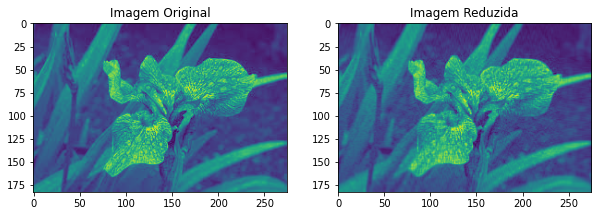

In [40]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121) 
plt.title("Imagem Original") 
plt.imshow(gray_setosa)
fig.add_subplot(122) 
plt.title("Imagem Reduzida") 
plt.imshow(setosa_arr_50)
plt.show()